In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from Utils import Processing
from Models import ANN_1, ConvMassimo

2023-09-30 19:46:37.797074: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 19:46:37.831397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-30 19:46:37.831433: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-30 19:46:37.831454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-30 19:46:37.837185: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 19:46:37.837566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
importlib.reload(Processing)
importlib.reload(ANN_1)

<module 'Models.ANN_1' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/ANN_1.py'>

In [4]:
X_train = np.load('PCA_Data/X_train_pca.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_test = np.load('PCA_Data/labels_list_test.npy')

In [5]:
X_train = X_train.reshape(-1, 27, 27)
X_train.shape

(5121, 27, 27)

In [6]:
# normalize each image with min-max normalization
for i in range(len(X_train)):
    max = X_train[i].max()
    min = X_train[i].min()
    X_train[i] = (X_train[i] - min) / (max - min)

In [7]:
X_test = X_test.reshape(-1, 27, 27)
X_test.shape

(1279, 27, 27)

In [8]:
for i in range(len(X_test)):
    max = X_test[i].max()
    min = X_test[i].min()
    X_test[i] = (X_test[i] - min) / (max - min)

In [9]:
#from Utils import Visualizing
#importlib.reload(Visualizing)
#
#Visualizing.display2([X_train], labels_train)

In [10]:
# # normalize data to [0,1] with min-max normalization using sklearn, normalize by row
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [11]:
validation_percentage = 0.20
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_val = labels_train[int(1-validation_percentage * len(labels_train)):]
labels_train = labels_train[:int(1-validation_percentage * len(labels_train))]

In [12]:
labels_train = Processing.convert_labels(labels_train)
labels_train = labels_train/(labels_train.max())

labels_val = Processing.convert_labels(labels_val)
labels_val = labels_val/(labels_val.max())

labels_test = Processing.convert_labels(labels_test)
labels_test = labels_test/(labels_test.max())

In [13]:
X_train.shape

(4098, 27, 27)

In [14]:
X_val.shape

(1023, 27, 27)

In [15]:
np.unique(labels_train, return_counts=True)

(array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([2069, 1436,  551,   42]))

In [16]:
np.unique(labels_val, return_counts=True)

(array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([491, 356, 166,  10]))

In [17]:
np.unique(labels_test, return_counts=True)

(array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([640, 448, 179,  12]))

In [18]:
#img_height=41
#img_width=87

In [69]:
importlib.reload(ConvMassimo)
model = ConvMassimo.build_Model(input_shape=(27,27,1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 27, 27, 16)        1312      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 9, 9, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 32)          41504     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 288)               0         
                                                                 
 dense_24 (Dense)            (None, 200)             

In [70]:
#importlib.reload(ANN_1)
#model = ANN_1.build_Model(input_shape=(27,27))
#model.summary()

In [71]:
hystory = model.fit(
    x=X_train,
    y=labels_train,
    epochs=100,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(X_val, labels_val),
)

Epoch 1/100


65/65 [==============================] - 5s 61ms/step - loss: 0.0654 - val_loss: 0.0660
Epoch 2/100
65/65 [==============================] - 4s 58ms/step - loss: 0.0629 - val_loss: 0.0658
Epoch 3/100
65/65 [==============================] - 4s 58ms/step - loss: 0.0630 - val_loss: 0.0663
Epoch 4/100
65/65 [==============================] - 4s 58ms/step - loss: 0.0625 - val_loss: 0.0659
Epoch 5/100
65/65 [==============================] - 4s 59ms/step - loss: 0.0628 - val_loss: 0.0675
Epoch 6/100
65/65 [==============================] - 4s 58ms/step - loss: 0.0625 - val_loss: 0.0659
Epoch 7/100
65/65 [==============================] - 4s 58ms/step - loss: 0.0629 - val_loss: 0.0658
Epoch 8/100
65/65 [==============================] - 4s 59ms/step - loss: 0.0625 - val_loss: 0.0667
Epoch 9/100
65/65 [==============================] - 4s 59ms/step - loss: 0.0628 - val_loss: 0.0661
Epoch 10/100
65/65 [==============================] - 4s 59ms/step - loss: 0.0627 - val_loss: 0.0697
Epoch 11/10

KeyboardInterrupt: 

<Axes: title={'center': 'Hystory loss'}>

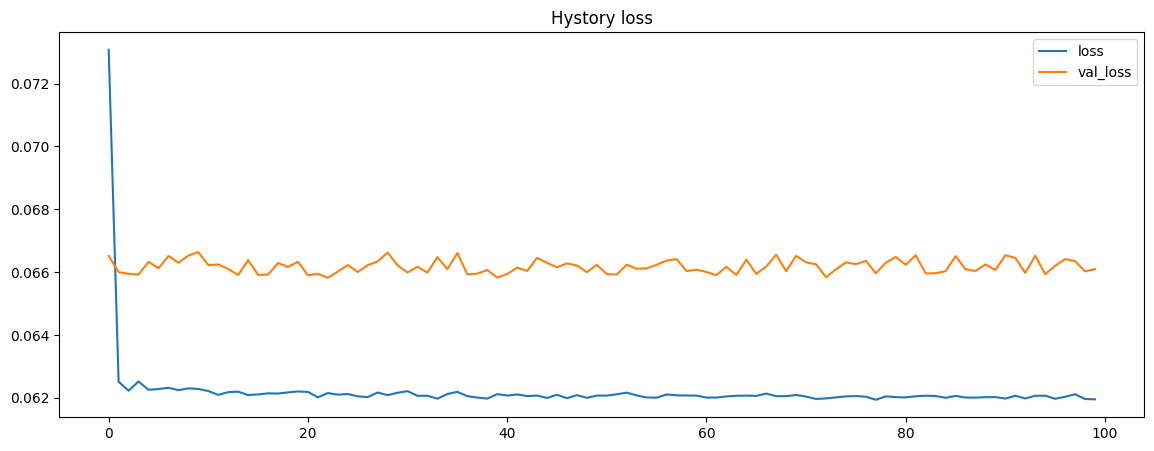

In [ ]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory.plot(figsize=(14, 5), title='Hystory loss')

In [ ]:
predictions = model.predict(X_test)

40/40 [==============================] - 0s 2ms/step


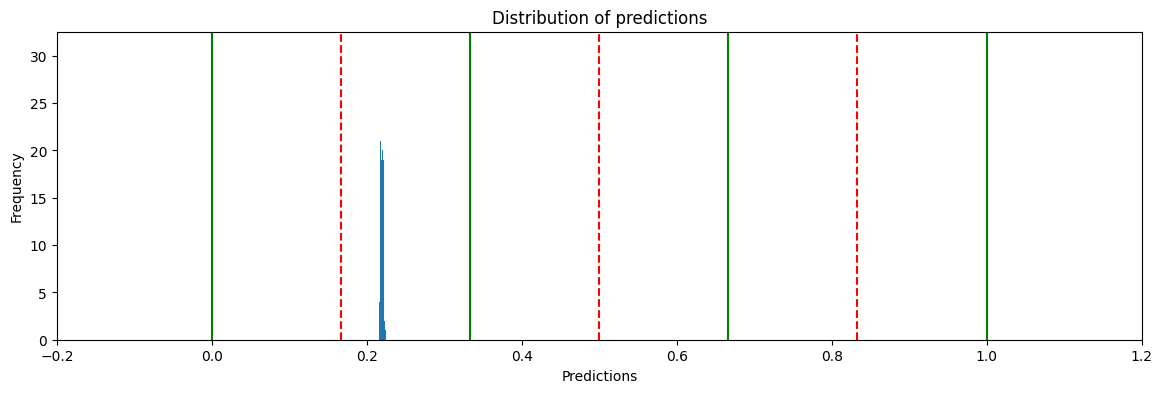

In [ ]:
# plot distribution of predictions
plt.figure(figsize=(14,4))
plt.hist(predictions,bins=100)
plt.title("Distribution of predictions")
plt.xlabel("Predictions")
plt.ylabel("Frequency")
# add three vertical lines to show where the classes are
#plt.axvline(x=0.004442925495557074, color='r', linestyle='-')
#plt.axvline(x=0.031090150887552345, color='r', linestyle='-')
#plt.axvline(x=0.5266472253919953, color='r', linestyle='-')
plt.axvline(x=0.0, color='g', linestyle='-')
plt.axvline(x=0.333, color='g', linestyle='-')
plt.axvline(x=0.666, color='g', linestyle='-')
plt.axvline(x=1.0, color='g', linestyle='-')
plt.axvline(x=0.1665, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.axvline(x=0.833, color='r', linestyle='--')
plt.xlim(-0.2,1.2)
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# computer regression metrics
print('R2 score: ', r2_score(labels_test, predictions))
print('MAE: ', mean_absolute_error(labels_test, predictions))
print('MSE: ', mean_squared_error(labels_test, predictions))

R2 score:  -0.00015686405495674016
MAE:  0.21965758822487458
MSE:  0.06235786629906655


In [ ]:
predictions_class = predictions * 3
predictions_class = predictions_class.round()
predictions_class = predictions_class.astype(int)
predictions_class

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
labels_test_class = labels_test *3
labels_test_class = labels_test_class.astype(int)
labels_test_class

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
# compute classification metrics
print(classification_report(labels_test_class, predictions_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       640
           1       0.35      1.00      0.52       448
           2       0.00      0.00      0.00       179
           3       0.00      0.00      0.00        12

    accuracy                           0.35      1279
   macro avg       0.09      0.25      0.13      1279
weighted avg       0.12      0.35      0.18      1279



/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

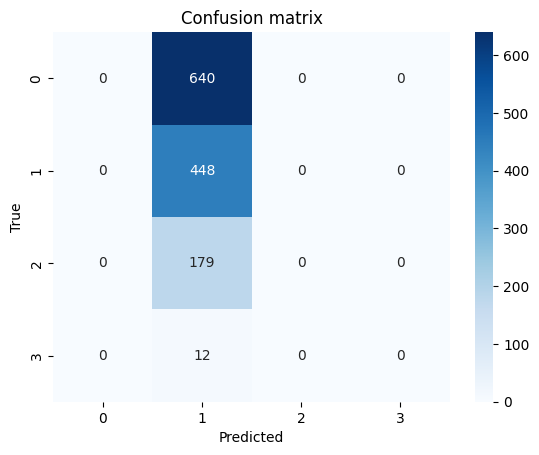

In [ ]:
# confusion matrix
cm = confusion_matrix(labels_test_class, predictions_class)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [ ]:
labels_train_class = labels_train *3
labels_train_class = labels_train_class.astype(int)
labels_train_class

array([2, 1, 1, ..., 1, 0, 0])